In [6]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN
import seaborn as sns

# Estimate Mean

In [14]:
gan = GAN(data_dim = 10, eps= 0.1)
gan.dist_init(setting='mu', true_mean=5, out_mean=0)
gan.data_init(data_size=1000, mc_ratio=3)
gan.model_init()
gan.optimizer_init(lr_d =1, lr_g=0.02, decay_par=0.4, reg_d=6e-5)
gan.fit(optim_iter=1000)

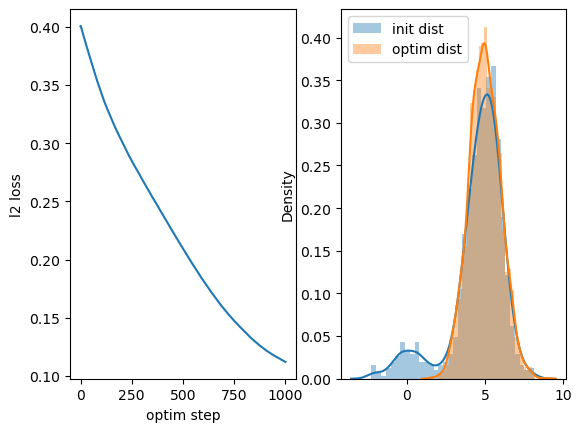

In [22]:
#plot result

plt.subplot(1, 2, 1)
plt.plot(gan.l2_loss)
plt.xlabel('optim step')
plt.ylabel('l2 loss')

plt.subplot(1, 2, 2)
sns.distplot(gan.data[:, 0], label='init dist')
sns.distplot(gan._z()[:, 0], label='optim dist')
plt.legend()


# Estimate Covariance Matrix

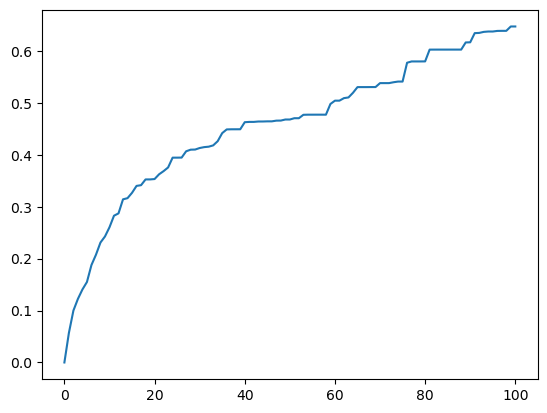

In [2]:
gan = GAN(data_dim = 10, eps= 0.1)
gan.dist_init(setting= 'sigma', true_mean = 0, out_mean = 5)
gan.data_init(data_size = 1000, mc_size= 3)
gan.model_init(G_init_option='true')
gan.optimizer_init(lr_d = 0.14, lr_g = 0.09, decay_par = 0.12)
gan.fit(optim_iter= 100)

#plot result
plt.plot(gan.l2_loss)